In [1]:
# _*_ coding: utf-8 _*_
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re # 正则表达式库
import collections # 词频统计库
import wordcloud # 词云展示库
from PIL import Image # 图像处理库

In [4]:
plt.rcParams['font.sans-serif'] = 'SimHei' #设置中文显示
plt.rcParams['axes.unicode_minus'] = False
firstdata=pd.read_csv('附件1.csv', sep = ',', encoding = 'gbk')#导入数据
extra=pd.read_csv('附件2.csv', sep = ',', encoding = 'gbk')
print('售货机出售详情表的前五行为：', '\n', firstdata[:][0:5])
print('售货机出售详情表的列名为：', '\n', firstdata.columns)
print('售货机出售详情表的形状为：', '\n', firstdata.shape)

售货机出售详情表的前五行为： 
                              订单号             设备ID  应付金额  实际金额            商品  \
0  DD201708167493663618499909784  E43A6E078A07631   4.5   4.5  68g好丽友巧克力派2枚   
1  DD201708167493663555814061164  E43A6E078A04172   3.0   3.0    40g双汇玉米热狗肠   
2  DD201708167493578526890939886  E43A6E078A06874   5.5   5.5     430g泰奇八宝粥   
3  DD201708167493683507186615837  E43A6E078A04228   5.0   5.0  48g好丽友薯愿香烤原味   
4  DD201708167493759548618252006  E43A6E078A04134   3.0   3.0     600ml可口可乐   

            支付时间 地点      状态   提现  
0  2017/1/1 0:53  D  已出货未退款  已提现  
1  2017/1/1 1:33  A  已出货未退款  已提现  
2  2017/1/1 8:45  E  已出货未退款  已提现  
3  2017/1/1 9:05  C  已出货未退款  已提现  
4  2017/1/1 9:41  B  已出货未退款  已提现  
售货机出售详情表的列名为： 
 Index(['订单号', '设备ID', '应付金额', '实际金额', '商品', '支付时间', '地点', '状态', '提现'], dtype='object')
售货机出售详情表的形状为： 
 (70680, 9)


In [11]:
xiangsi = firstdata[['应付金额','实际金额']].corr(method='kendall')
print('应付金额和实际金额的kendall相似度为：\n',xiangsi)
#应付金额和实际金额完全一致，删去应付金额
firstdata.drop(labels = '应付金额',axis = 1,inplace =True)

print('详情表‘状态’和‘提现’两列的描述性统计为：\n', firstdata.loc[:, ['状态','提现']].describe())
#‘状态’和‘提现’两列中所有元素都相同，删去
firstdata.drop(labels = '状态',axis = 1,inplace =True)
firstdata.drop(labels = '提现',axis = 1,inplace =True)

print('详情表设备ID和地点两列的描述性统计为：\n', firstdata.loc[:, ['设备ID','地点']].describe())
print('详情表设备ID频数统计结果为：\n', firstdata['设备ID'].value_counts()[:])
print('详情表地点频数统计结果为：\n', firstdata['地点'].value_counts()[:])
#设备ID和地点一一对应，删去设备id
firstdata.drop(labels = '设备ID',axis = 1,inplace =True)

应付金额和实际金额的kendall相似度为：
       应付金额  实际金额
应付金额   1.0   1.0
实际金额   1.0   1.0
详情表‘状态’和‘提现’两列的描述性统计为：
             状态     提现
count    70680  70680
unique       1      1
top     已出货未退款    已提现
freq     70680  70680
详情表设备ID和地点两列的描述性统计为：
                    设备ID     地点
count             70680  70680
unique                5      5
top     E43A6E078A06874      E
freq              23505  23505
详情表设备ID频数统计结果为：
 E43A6E078A06874    23505
E43A6E078A04228    14494
E43A6E078A04134    13482
E43A6E078A04172    10486
E43A6E078A07631     8713
Name: 设备ID, dtype: int64
详情表地点频数统计结果为：
 E    23505
C    14494
B    13482
A    10486
D     8713
Name: 地点, dtype: int64


In [12]:
print('售货机出售详情表的后五行为：', '\n', firstdata.tail(3))
#发现一个异常值"2017/2/29  3:44:00 PM"，查找并删去
firstdata.drop(labels={70679},axis=0,inplace = True)

售货机出售详情表的后五行为： 
                                  订单号  实际金额            商品  \
70677  DD20170613020607768E3940FA188   3.0         统一冰红茶   
70678  DD2017060217303716A53CCD6B185   6.0         安慕希酸奶   
70679  DD201708167493241554692026752   4.0  55g奥利奥原味芝士饼干   

                        支付时间 地点  
70677       2017/12/31 22:39  C  
70678       2017/12/31 23:10  D  
70679  2017/2/29  3:44:00 PM  C  


In [13]:
#加入商品分类内容
seconddata= pd.merge(firstdata,extra,left_on='商品', right_on = '商品')

#任务1-1：分开数据
dataa=seconddata.loc[seconddata['地点']=='A']
datab=seconddata.loc[seconddata['地点']=='B']
datac=seconddata.loc[seconddata['地点']=='C']
datad=seconddata.loc[seconddata['地点']=='D']
datae=seconddata.loc[seconddata['地点']=='E']
dataa.drop(labels = '地点',axis = 1,inplace =True)
datab.drop(labels = '地点',axis = 1,inplace =True)
datac.drop(labels = '地点',axis = 1,inplace =True)
datad.drop(labels = '地点',axis = 1,inplace =True)
datae.drop(labels = '地点',axis = 1,inplace =True)

dataa.to_csv('task1-1A.csv',sep = ',',index = False, encoding = 'gbk')
datab.to_csv('task1-1B.csv',sep = ',',index = False, encoding = 'gbk')
datac.to_csv('task1-1C.csv',sep = ',',index = False, encoding = 'gbk')
datad.to_csv('task1-1D.csv',sep = ',',index = False, encoding = 'gbk')
datae.to_csv('task1-1E.csv',sep = ',',index = False, encoding = 'gbk')

C:\ProgramData\Anaconda33\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [2]:
#任务1-2：计算每台售货机五月的订单量、销售额和所有售货机交易总额和交易总量
adata=pd.read_csv('task1-1A.csv', sep = ',', encoding = 'gbk')
bdata=pd.read_csv('task1-1B.csv', sep = ',', encoding = 'gbk')
cdata=pd.read_csv('task1-1C.csv', sep = ',', encoding = 'gbk')
ddata=pd.read_csv('task1-1D.csv', sep = ',', encoding = 'gbk')
edata=pd.read_csv('task1-1E.csv', sep = ',', encoding = 'gbk')
def may(data):
    data['支付时间']=pd.to_datetime(data['支付时间'])
    data['month'] = [i.month for i in data['支付时间']]
    may=data.loc[data['month']==5]
    sse=np.around(may['实际金额'].sum(),3)
    ddl=may['商品'].shape[0]
    return sse,ddl
[a1,a2]=may(adata)
[b1,b2]=may(bdata)
[c1,c2]=may(cdata)
[d1,d2]=may(ddata)
[e1,e2]=may(edata)
f=[a1,b1,c1,d1,e1]
g=[a2,b2,c2,d2,e2]
ff=np.around(sum(f),3)
gg=sum(g)
dict={'地点':['A','B','C','D','E','总'],'销售额':[a1,b1,c1,d1,e1,ff],'订单量':[a2,b2,c2,d2,e2,gg]}
df = pd.DataFrame(dict)
print(df)

  地点      销售额   订单量
0  A   3385.1   756
1  B   3681.2   869
2  C   3729.4   789
3  D   2392.1   564
4  E   5699.0  1292
5  总  18886.8  4270


In [15]:
#任务1-3：计算每台售货机每月每单平均交易额和日均订单量
def mmean(data):
    data['支付时间']=pd.to_datetime(data['支付时间'])
    data['month'] = [i.month for i in data['支付时间']]
    data['date'] = [i.date for i in data['支付时间']]
    Group = data[['month','实际金额']].groupby(by='month')
    monthMean =np.around(Group.agg({'实际金额':np.mean}),2)
    daymean=np.around(Group.size()/31,0)
    daymean=pd.DataFrame({'日订单平均数':daymean})
    cc=pd.concat([monthMean,daymean],axis=1,join='outer')
    cc=cc.rename(columns={'实际金额': '每单平均交易额'})
    return cc
print('A',mmean(adata))
print('B',mmean(bdata))
print('C',mmean(cdata))
print('D',mmean(ddata))
print('E',mmean(edata))

A        每单平均交易额  日订单平均数
month                 
1         4.51    11.0
2         3.86     4.0
3         3.59     8.0
4         4.04    14.0
5         4.48    24.0
6         4.05    54.0
7         4.10    15.0
8         3.36    21.0
9         4.31    34.0
10        4.02    50.0
11        4.47    37.0
12        3.79    65.0
B        每单平均交易额  日订单平均数
month                 
1         3.75    12.0
2         3.26     6.0
3         3.61     9.0
4         4.08    19.0
5         4.24    28.0
6         4.07    60.0
7         4.40    11.0
8         3.58    32.0
9         4.13    56.0
10        4.11    65.0
11        4.27    66.0
12        3.67    71.0
C        每单平均交易额  日订单平均数
month                 
1         4.33    12.0
2         3.83     7.0
3         3.77     8.0
4         4.40    24.0
5         4.73    25.0
6         4.50    61.0
7         3.99    25.0
8         3.91    41.0
9         4.43    54.0
10        4.27    71.0
11        4.35    63.0
12        3.94    77.0
D        每单平均交易额  日订单平均数
mon

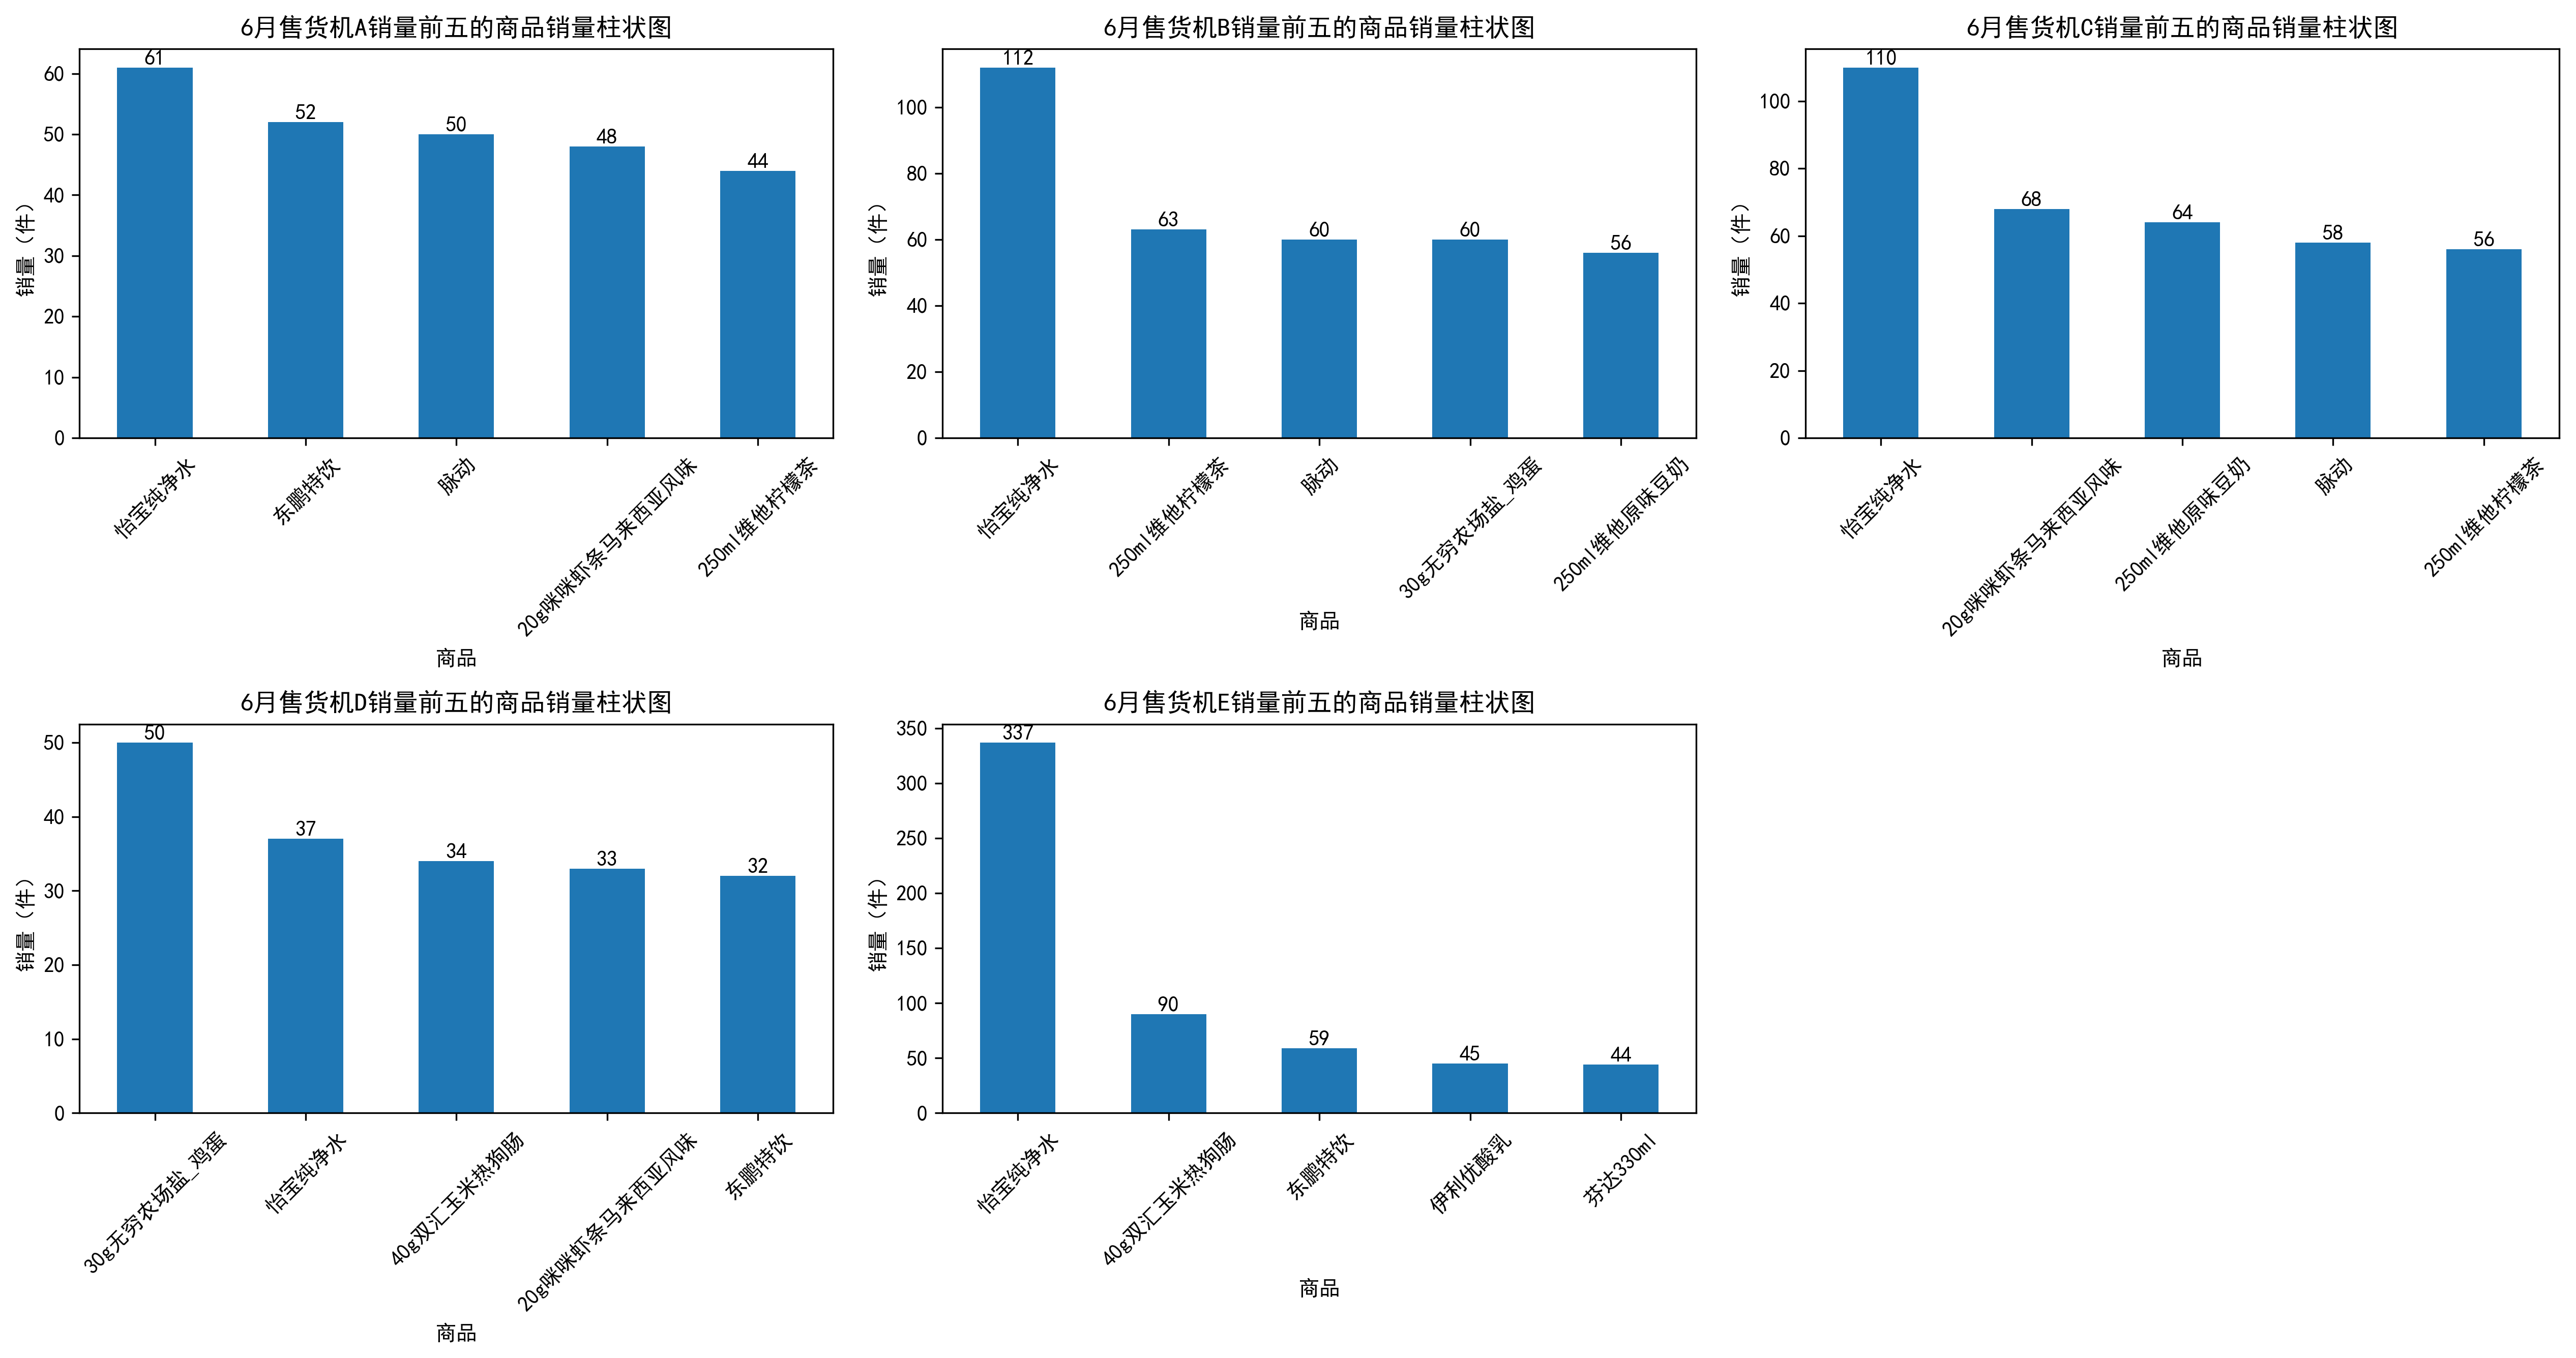

In [16]:
#任务2-1:17年6月销量前五的商品销量柱状图
def topfive(data):
    data['支付时间'] = pd.to_datetime(data['支付时间'])
    data['month'] = [i.month for i in data['支付时间']]
    june=data.loc[data['month']==6]
    values =june['商品'].value_counts()[:5]
    values.plot('bar')
    plt.xticks(rotation=45)
    plt.xlabel('商品')
    plt.ylabel('销量（件）')
    for i in range(len(values)):
        plt.text(i,values[i],values[i], va='bottom', ha='center')

p1=plt.figure(dpi=300,figsize=(17,9))
p1.add_subplot(2,3,1)
topfive(adata)
plt.title('6月售货机A销量前五的商品销量柱状图')
p1.add_subplot(2,3,2)
topfive(bdata)
plt.title('6月售货机B销量前五的商品销量柱状图')
p1.add_subplot(2,3,3)
topfive(cdata)
plt.title('6月售货机C销量前五的商品销量柱状图')
p1.add_subplot(2,3,4)
topfive(ddata)
plt.title('6月售货机D销量前五的商品销量柱状图')
p1.add_subplot(2,3,5)
topfive(edata)
plt.title('6月售货机E销量前五的商品销量柱状图')
plt.tight_layout()
plt.savefig('6月售货机销量前五的商品销量柱状图.png')
plt.show()

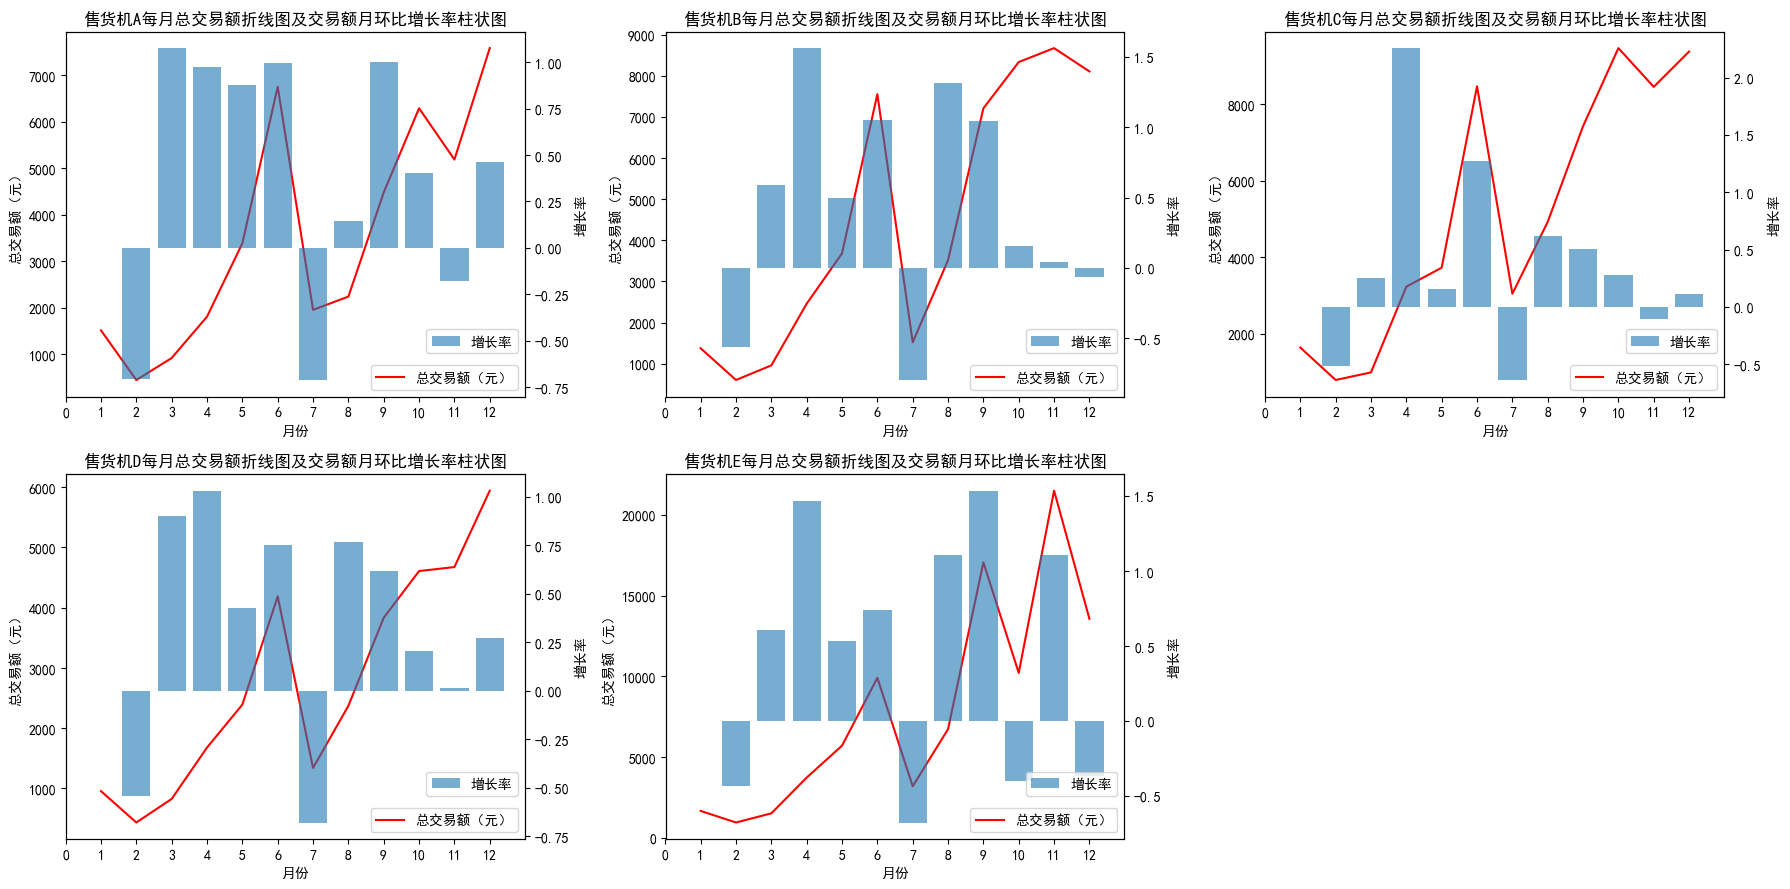

In [17]:
#任务2-2：每台售货机每月总交易额折线图及交易额月环比增长率柱状图
#环比增长率=（本期数-上期数）/上期数×100%
p3=plt.figure(dpi=100,figsize=(18,9))
ax1=p3.add_subplot(2,3,1)

def payrate(data,ax):
    data['支付时间']=pd.to_datetime(data['支付时间'])
    data['month'] = [i.month for i in data['支付时间']]
    Group = data[['month','实际金额']].groupby(by='month')
    monthpay=np.around(Group.agg({'实际金额':np.sum}),2)
    plt.plot(monthpay,color='r',label=u'总交易额（元）')
    ax.legend(loc=4)
    plt.xlabel('月份')
    plt.ylabel('总交易额（元）')
    plt.xticks(range(-1,13,1))
    ax2 = ax.twinx()
    growthrate=(monthpay['实际金额']-monthpay['实际金额'].shift(1))/monthpay['实际金额'].shift(1)
    growthrate[1]=0
    plt.bar(range(1,13,1),growthrate,label=u'增长率',alpha=0.6)
    ax2.legend(loc=4,bbox_to_anchor=(1,0.1))
    plt.ylabel('增长率')
    
payrate(adata,ax1)
plt.title('售货机A每月总交易额折线图及交易额月环比增长率柱状图')
ax2=p3.add_subplot(2,3,2)
payrate(bdata,ax2)
plt.title('售货机B每月总交易额折线图及交易额月环比增长率柱状图')
ax3=p3.add_subplot(2,3,3)
payrate(cdata,ax3)
plt.title('售货机C每月总交易额折线图及交易额月环比增长率柱状图')
ax4=p3.add_subplot(2,3,4)
payrate(ddata,ax4)
plt.title('售货机D每月总交易额折线图及交易额月环比增长率柱状图')
ax5=p3.add_subplot(2,3,5)
payrate(edata,ax5)
plt.title('售货机E每月总交易额折线图及交易额月环比增长率柱状图')
plt.tight_layout()
plt.savefig('每台售货机每月总交易额折线图及交易额月环比增长率柱状图.png')
plt.show()

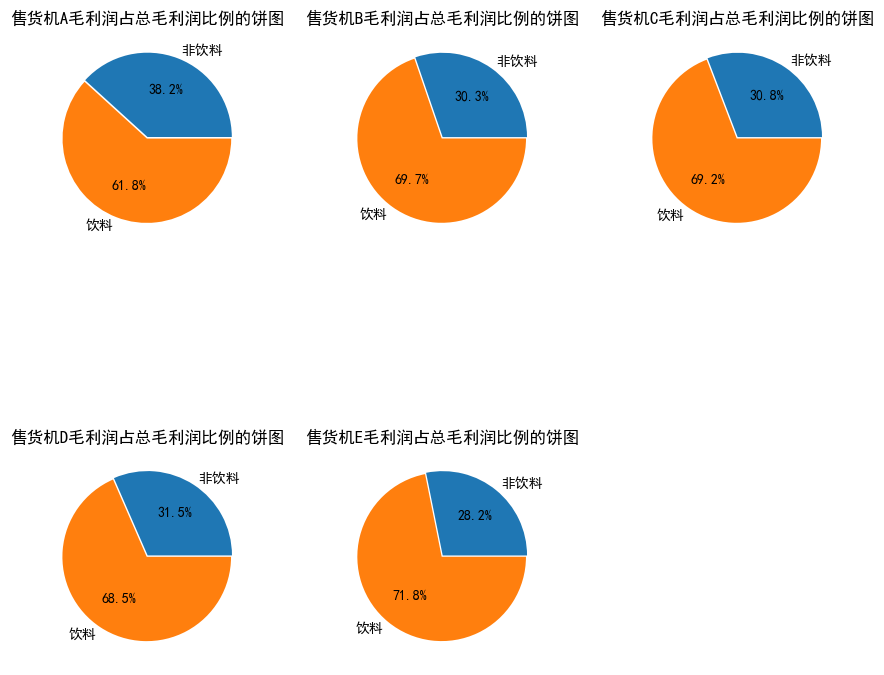

In [5]:
#任务2-3:每台售货机毛利润占总毛利润比例的饼图（饮料25%，非饮料20%）
def gpm(data):
    Group = data[['大类','实际金额']].groupby(by='大类')
    drink=Group.agg({'实际金额':np.sum})
    drink[:1]=drink[:1]*0.2
    drink[1:2]=drink[1:2]*0.25
    label= ['非饮料','饮料']## 定义饼状图的标签，标签是列表
    explode = [0.01,0.01]## 设定各项离心n个半径
    plt.pie(drink['实际金额'], explode=explode, labels=label, autopct='%1.1f%%')
    
p4=plt.figure(dpi=100,figsize=(9,9))
ax1=p4.add_subplot(2,3,1)
gpm(adata)
plt.title('售货机A毛利润占总毛利润比例的饼图')
ax2=p4.add_subplot(2,3,2)
gpm(bdata)
plt.title('售货机B毛利润占总毛利润比例的饼图')
ax3=p4.add_subplot(2,3,3)
gpm(cdata)
plt.title('售货机C毛利润占总毛利润比例的饼图')
ax4=p4.add_subplot(2,3,4)
gpm(ddata)
plt.title('售货机D毛利润占总毛利润比例的饼图')
ax5=p4.add_subplot(2,3,5)
gpm(edata)
plt.title('售货机E毛利润占总毛利润比例的饼图')
plt.tight_layout()
plt.savefig('每台售货机毛利润占总毛利润比例的饼图.png')
plt.show()

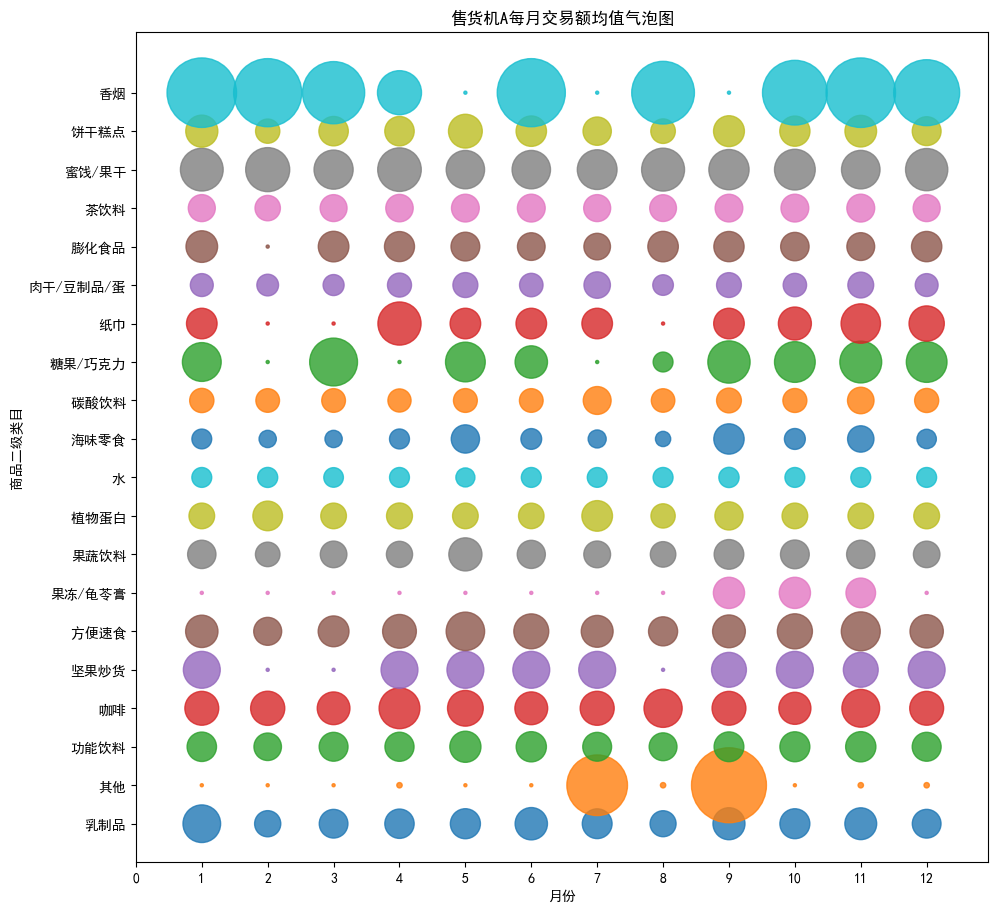

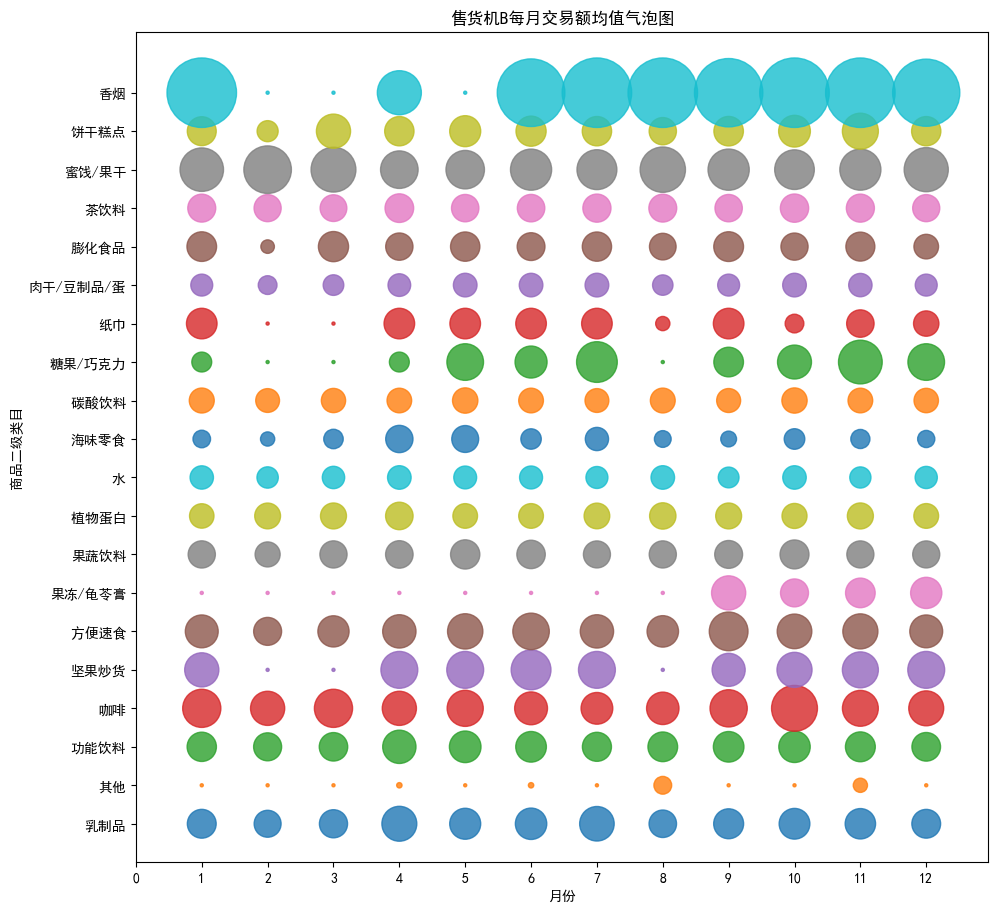

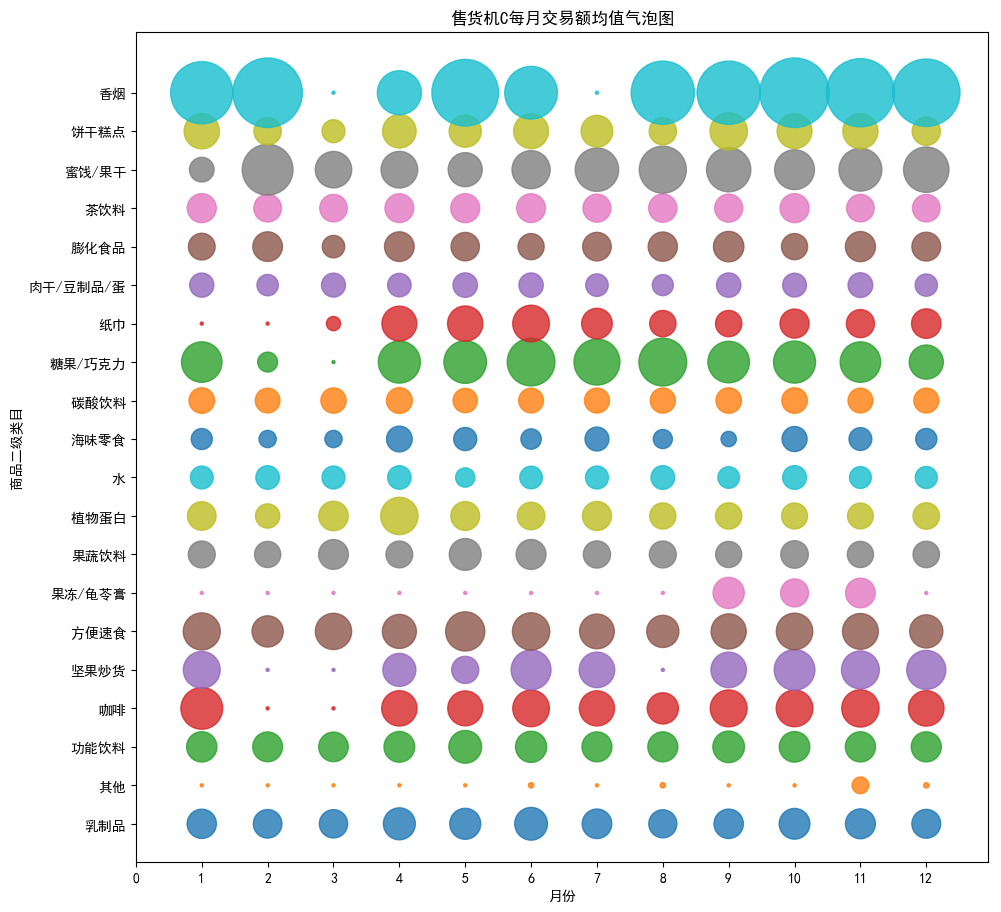

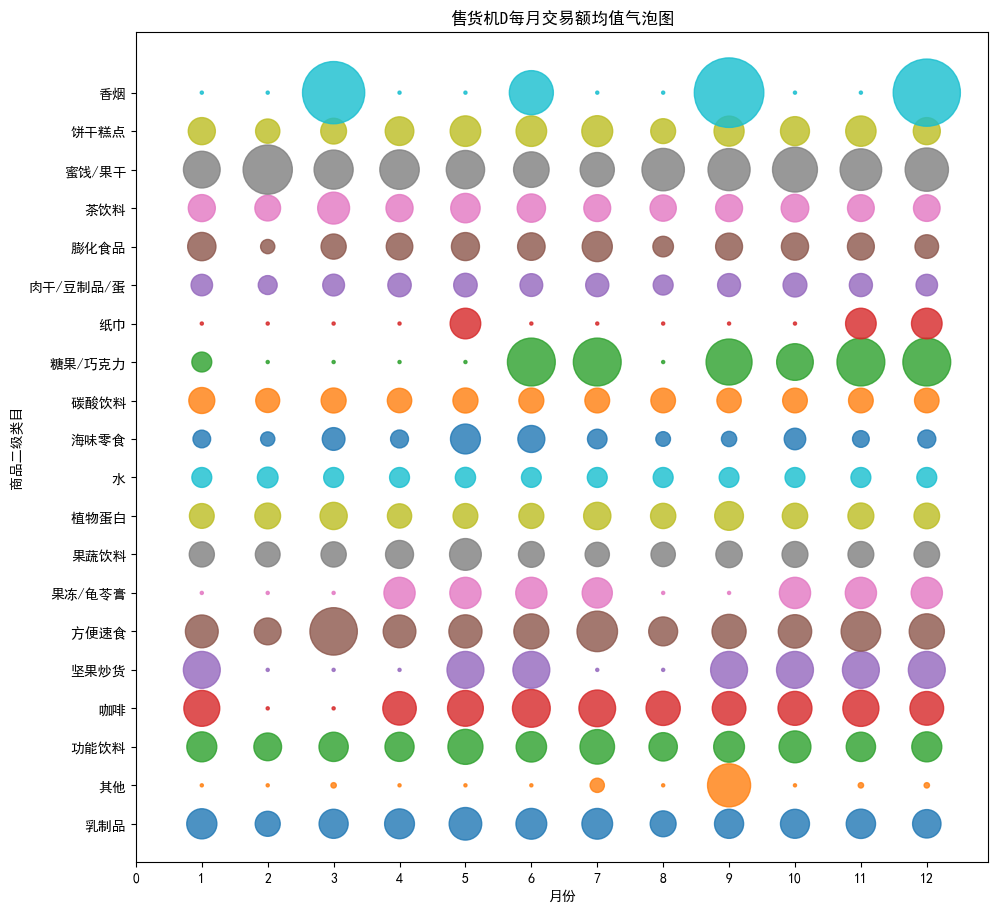

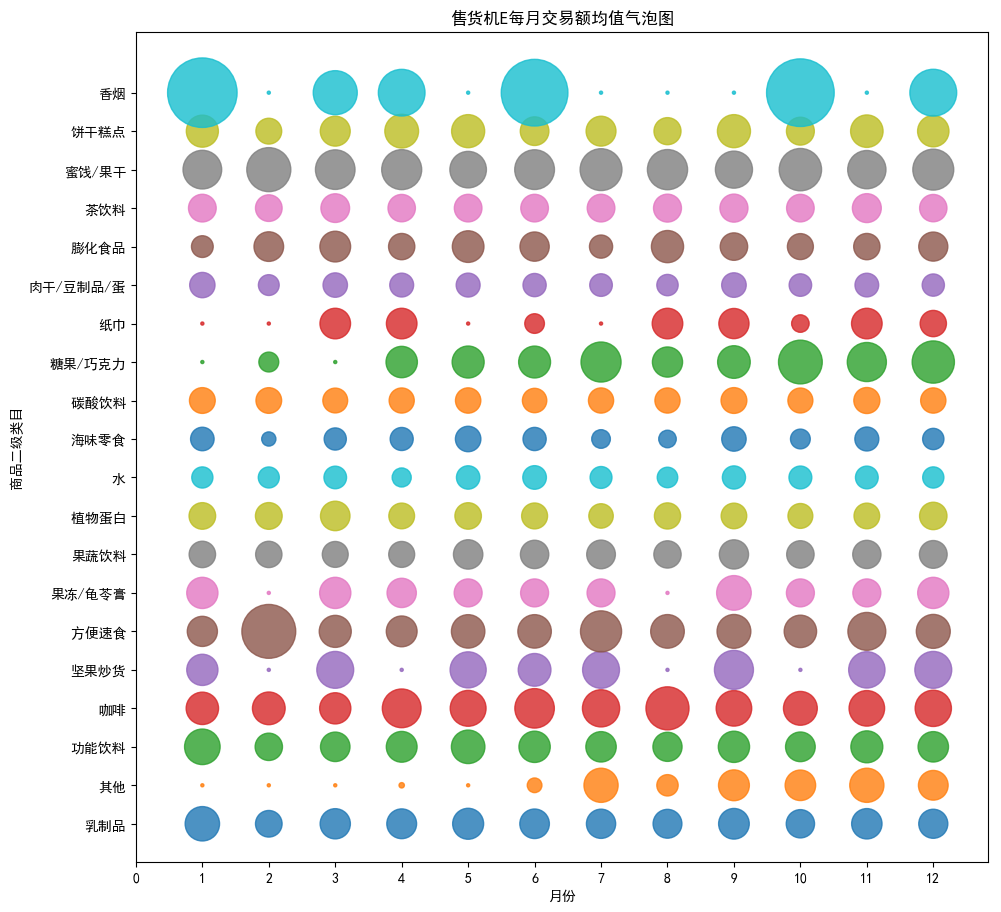

In [19]:
#任务2-4：每月交易额均值气泡图，横轴为时间，纵轴为商品二级类目
def bubble(data):
    data['支付时间']=pd.to_datetime(data['支付时间'])
    data['month'] = [i.month for i in data['支付时间']]
    CrossDetail = pd.pivot_table(data[['month','二级类','实际金额']],index='month',
                             columns='二级类',values = '实际金额',margins = True,fill_value = 0)
    for i in range(1,21):
        size=CrossDetail.iloc[:-1,(i-1):i]
        z=(size+0.05)*100
        plt.scatter(range(1,13,1),i*np.ones((1,12)),z,alpha=0.8)
    name=['乳制品', '其他', '功能饮料', '咖啡', '坚果炒货',' 方便速食', '果冻/龟苓膏', '果蔬饮料',' 植物蛋白', '水', '海味零食',
            ' 碳酸饮料', '糖果/巧克力', '纸巾', '肉干/豆制品/蛋', '膨化食品', '茶饮料', '蜜饯/果干', '饼干糕点', '香烟']
    plt.yticks(range(1,21,1),name)
    plt.xticks(range(0,13,1))
    plt.xlabel('月份')
    plt.ylabel('商品二级类目')
    
p5=plt.figure(dpi=100,figsize=(11,11))
bubble(adata)
plt.title('售货机A每月交易额均值气泡图')
plt.savefig('售货机A每月二级类交易额均值气泡图.png')
plt.show()
p5=plt.figure(dpi=100,figsize=(11,11))
bubble(bdata)
plt.title('售货机B每月交易额均值气泡图')
plt.savefig('售货机B每月二级类交易额均值气泡图.png')
plt.show()
p5=plt.figure(dpi=100,figsize=(11,11))
bubble(cdata)
plt.title('售货机C每月交易额均值气泡图')
plt.savefig('售货机C每月二级类交易额均值气泡图.png')
plt.show()
p5=plt.figure(dpi=100,figsize=(11,11))
bubble(ddata)
plt.title('售货机D每月交易额均值气泡图')
plt.savefig('售货机D每月二级类交易额均值气泡图.png')
plt.show()
p5=plt.figure(dpi=100,figsize=(11,11))
bubble(edata)
plt.title('售货机E每月交易额均值气泡图')
plt.savefig('售货机E每月二级类交易额均值气泡图.png')
plt.show()

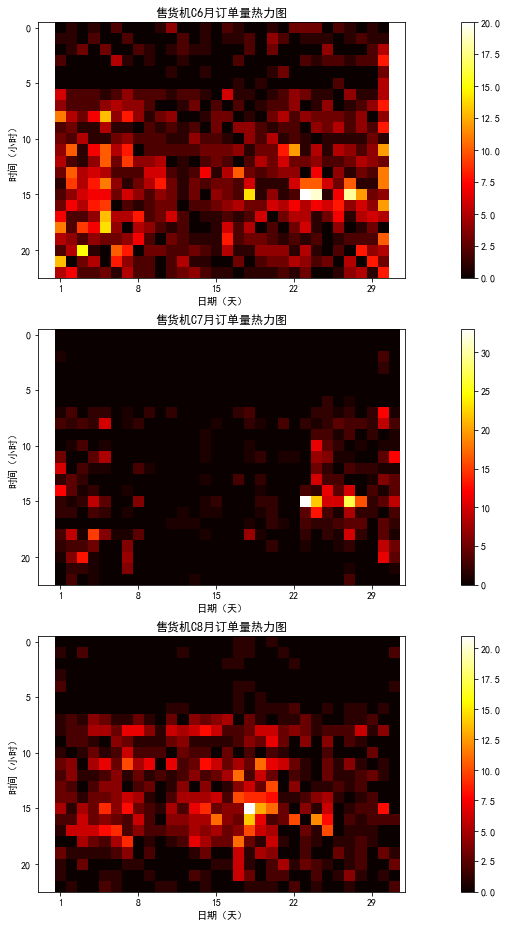

In [20]:
#任务2-5:售货机C6,7,8月订单量热力图，横轴为天，纵轴为小时
p6=plt.figure(figsize=(20, 16))
cdata['支付时间']=pd.to_datetime(cdata['支付时间'])
cdata['month'] = [i.month for i in cdata['支付时间']]
cdata['day'] = [i.day for i in cdata['支付时间']]
cdata['hour'] = [i.hour for i in cdata['支付时间']]
cjune=cdata.loc[cdata['month']==6]
cjuly=cdata.loc[cdata['month']==7]
caug=cdata.loc[cdata['month']==8]

def hot(data):
    maxdate=data['day'].max()
    amount=np.arange(23*maxdate)
    amount=amount.reshape((23,maxdate))
    a=[]
    for j in range(1,maxdate+1):
        detail1=data.loc[data['day']==j]
        for i in range(24):
            detail2=detail1.loc[detail1['hour']==i]
            amount[i-1,j-1:j]=detail2['商品'].shape[0]
    plt.imshow(amount,cmap=plt.cm.hot) 
    plt.colorbar()
    plt.xlim(-2,31)
    plt.xticks(range(0,32,7))
    plt.xlabel('日期（天）')
    plt.ylabel('时间（小时）')

ax1=p6.add_subplot(3,1,1)
hot(cjune)
ax1.set_xticklabels([1,8,15,22,29])
plt.title('售货机C6月订单量热力图')
ax2=p6.add_subplot(3,1,2)
hot(cjuly)
ax2.set_xticklabels([1,8,15,22,29])
plt.title('售货机C7月订单量热力图')
ax3=p6.add_subplot(3,1,3)
hot(caug)
ax3.set_xticklabels([1,8,15,22,29])
plt.title('售货机C8月订单量热力图')
plt.savefig('售货机C6,7,8月订单量热力图.png')
plt.show()

In [10]:
#任务3-1:给出每台售货机饮料类商品的标签
def fenlei(data):
    drink=data.loc[data['大类']=='饮料']
    values =drink['商品'].value_counts()
    value2=values.rename_axis('商品').reset_index(name='单数')
    return value2

value2=fenlei(adata)
#print(value2.shape[0]/3)
#print(value2[35:38])
#print(value2[70:77])
#分成三段，查看数据；>51：热销；<10：滞销
d1=value2.loc[:37]
d1['标签'] = '热销'
d2=value2.loc[37:71]
d2['标签'] = '正常'
d3=value2.loc[71:]
d3['标签'] = '滞销'
value3=d1.append(d2)
value3=value3.append(d3)
value3.to_csv('task3-1A.csv',sep = ',',index = False, encoding = 'gbk')

C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [ ]:
value2=fenlei(bdata)
#print(value2.shape[0]/3)
#print(value2[37:39])
#print(value2[70:77])
#分成三段，>57：热销；<9：滞销
d1=value2.loc[:38]
d1['标签'] = '热销'
d2=value2.loc[38:71]
d2['标签'] = '正常'
d3=value2.loc[71:]
d3['标签'] = '滞销'
value3=d1.append(d2)
value3=value3.append(d3)
value3.to_csv('task3-1B.csv',sep = ',',index = False, encoding = 'gbk')

In [ ]:
value2=fenlei(cdata)
#print(value2.shape[0]/3)
#print(value2[37:39])
#print(value2[70:77])
#分成三段，>57：热销；<11：滞销
d1=value2.loc[:38]
d1['标签'] = '热销'
d2=value2.loc[38:74]
d2['标签'] = '正常'
d3=value2.loc[74:]
d3['标签'] = '滞销'
value3=d1.append(d2)
value3=value3.append(d3)
value3.to_csv('task3-1C.csv',sep = ',',index = False, encoding = 'gbk')

In [ ]:
value2=fenlei(ddata)
#print(value2.shape[0]/3)
#print(value2[34:36])
#print(value2[65:71])
#分成三段，>33：热销；<5：滞销
d1=value2.loc[:35]
d1['标签'] = '热销'
d2=value2.loc[35:69]
d2['标签'] = '正常'
d3=value2.loc[69:]
d3['标签'] = '滞销'
value3=d1.append(d2)
value3=value3.append(d3)
value3.to_csv('task3-1D.csv',sep = ',',index = False, encoding = 'gbk')

In [ ]:
value2=fenlei(edata)
#print(value2.shape[0]/3)
#print(value2[34:36])
#print(value2[65:71])
#分成三段，>140：热销；<29：滞销
d1=value2.loc[:35]
d1['标签'] = '热销'
d2=value2.loc[35:70]
d2['标签'] = '正常'
d3=value2.loc[70:]
d3['标签'] = '滞销'
value3=d1.append(d2)
value3=value3.append(d3)
value3.to_csv('task3-1E.csv',sep = ',',index = False, encoding = 'gbk')

In [11]:
#任务3-2：依据标签生成完整的售货机画像
def fenlei2(data):
    values =data['商品'].value_counts()
    value2=values.rename_axis('商品').reset_index(name='单数')
    return value2

v1=fenlei2(adata)
#print(v1)
#print(v1.shape[0]/3)
#print(v1[89:93])
#print(v1[170:184])
#分成三段，>90：热销；<8：滞销
d1=v1.loc[:90]
d1['标签'] = '热销'
d2=v1.loc[90:174]
d2['标签'] = '正常'
d3=v1.loc[174:]
d3['标签'] = '滞销'
v2=d1.append(d2)
v2=v2.append(d3)
v2=v2.drop(['单数'],1)
v2.to_csv('task3-2A1.csv',sep = ',',index = False, encoding = 'gbk')

C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [ ]:
v1=fenlei2(bdata)
#print(v1)
#print(v1.shape[0]/3)
#print(v1[84:90])
#print(v1[170:179])
#分成三段，>88：热销；<7：滞销
d1=v1.loc[:88]
d1['标签'] = '热销'
d2=v1.loc[88:174]
d2['标签'] = '正常'
d3=v1.loc[174:]
d3['标签'] = '滞销'
v2=d1.append(d2)
v2=v2.append(d3)
v2=v2.drop(['单数'],1)
v2.to_csv('task3-2B1.csv',sep = ',',index = False, encoding = 'gbk')

In [ ]:
v1=fenlei2(cdata)
#print(v1)
#print(v1.shape[0]/3)
#print(v1[84:90])
#print(v1[170:179])
#分成三段，>34：热销；<10：滞销
d1=v1.loc[:87]
d1['标签'] = '热销'
d2=v1.loc[87:175]
d2['标签'] = '正常'
d3=v1.loc[175:]
d3['标签'] = '滞销'
v2=d1.append(d2)
v2=v2.append(d3)
v2=v2.drop(['单数'],1)
v2.to_csv('task3-2C1.csv',sep = ',',index = False, encoding = 'gbk')

In [ ]:
v1=fenlei2(ddata)
#print(v1)
#print(v1.shape[0]/3)
#print(v1[75:80])
#print(v1[142:149])
#分成三段，>23：热销；<7：滞销
d1=v1.loc[:77]
d1['标签'] = '热销'
d2=v1.loc[77:144]
d2['标签'] = '正常'
d3=v1.loc[144:]
d3['标签'] = '滞销'
v2=d1.append(d2)
v2=v2.append(d3)
v2=v2.drop(['单数'],1)
v2.to_csv('task3-2D1.csv',sep = ',',index = False, encoding = 'gbk')

In [ ]:
v1=fenlei2(edata)
#print(v1)
#print(v1.shape[0]/3)
#print(v1[85:93])
#print(v1[175:182])
#分成三段，>56：热销；<16：滞销
d1=v1.loc[:88]
d1['标签'] = '热销'
d2=v1.loc[88:178]
d2['标签'] = '正常'
d3=v1.loc[178:]
d3['标签'] = '滞销'
v2=d1.append(d2)
v2=v2.append(d3)
v2=v2.drop(['单数'],1)
v2.to_csv('task3-2E1.csv',sep = ',',index = False, encoding = 'gbk')

In [14]:
abiaoqian=pd.read_csv('task3-2A1.csv', sep = ',', encoding = 'gbk')
bbiaoqian=pd.read_csv('task3-2B1.csv', sep = ',', encoding = 'gbk')
cbiaoqian=pd.read_csv('task3-2C1.csv', sep = ',', encoding = 'gbk')
dbiaoqian=pd.read_csv('task3-2D1.csv', sep = ',', encoding = 'gbk')
ebiaoqian=pd.read_csv('task3-2E1.csv', sep = ',', encoding = 'gbk')

def huaxiang(data1,data2):
    v3= pd.merge(data1,data2,left_on='商品', right_on = '商品')
    v4=v3.loc[v3['标签']=='热销']
    v4=v4[['商品','二级类']]
    v4.to_csv('biaoqian.txt',sep='\t',index=False)
    with open('biaoqian.txt',encoding = 'utf-8') as f:
        file = f.read()
    f=re.sub('\n',' ',file,10000)
    f=re.sub('/','',file,10000)
    w=wordcloud.WordCloud(scale=4,font_path="simsun.ttf",background_color='white',collocations=False,width=100,height=100).generate(f)
    p=plt.figure(dpi=100,figsize=(6,6))
    plt.imshow(w)
    plt.axis("off")


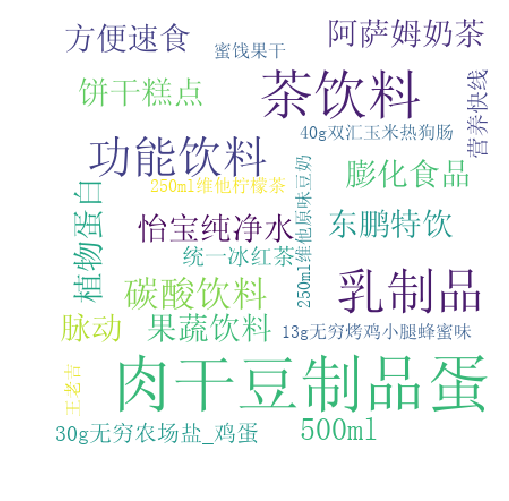

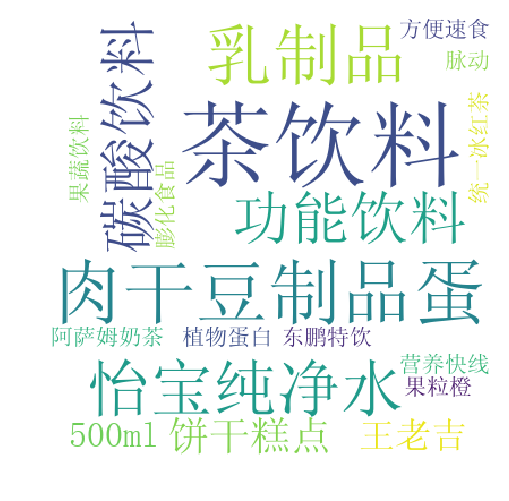

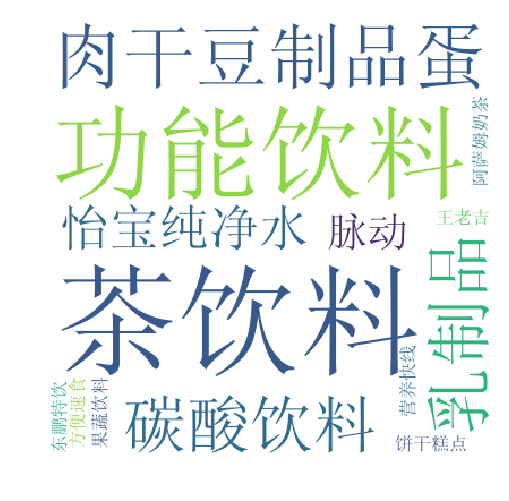

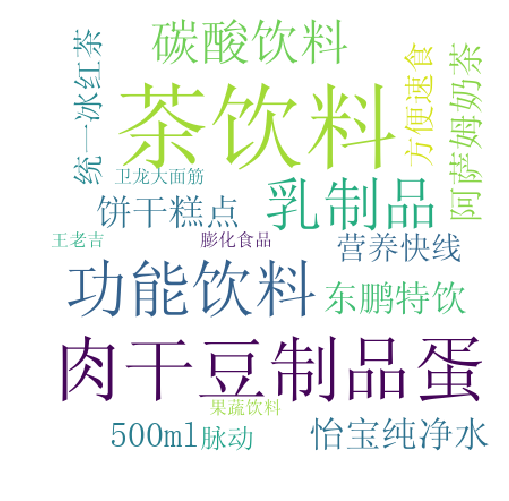

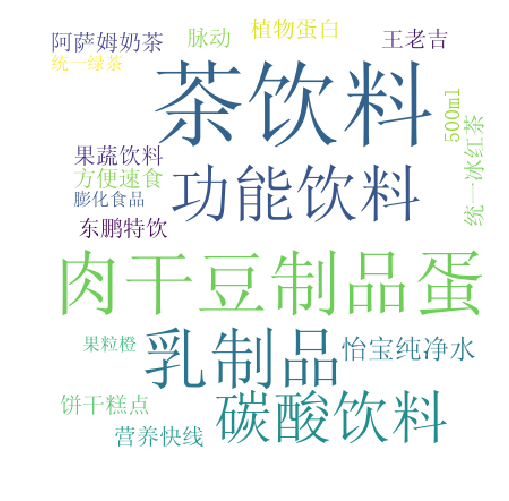

In [15]:
huaxiang(adata,abiaoqian)
plt.savefig('售货机A画像.png')
huaxiang(bdata,bbiaoqian)
plt.savefig('售货机B画像.png')
huaxiang(cdata,cbiaoqian)
plt.savefig('售货机C画像.png')
huaxiang(ddata,dbiaoqian)
plt.savefig('售货机D画像.png')
huaxiang(edata,ebiaoqian)
plt.savefig('售货机E画像.png')

In [1]:
#任务4：预测18年1月各售货机每个大类商品交易额
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.api import tsa

def yuce(data):
    data['支付时间']=pd.to_datetime(data['支付时间'])
    data['month'] = [i.month for i in data['支付时间']]
    Group = data[['month','实际金额']].groupby(by='month')
    monthpay=np.around(Group.agg({'实际金额':np.sum}),2)
    # 1阶差分
    data_diff = monthpay.diff()
    # 差分后需要排空，
    data_diff = data_diff.dropna()
    pmax = int(len(data_diff) / 10)    #一般阶数不超过 length /10
    qmax = int(len(data_diff) / 10)
    bic_matrix = []
    for p in range(pmax +1):
        temp= []
        for q in range(qmax+1):
            try:
                temp.append(ARIMA(monthpay, (p, 1, q)).fit().bic)
            except:
                temp.append(None)
            bic_matrix.append(temp)
            
    bic_matrix = pd.DataFrame(bic_matrix)   #将其转换成Dataframe 数据结构
    bic_matrix=bic_matrix.astype('float64')
    p,q = bic_matrix.stack().idxmin()   #先使用stack 展平， 然后使用 idxmin 找出最小值的位置
    model = ARIMA(monthpay, (p,1,q)).fit()
    value=model.forecast(1)   #为18年1月进行预测，返回预测结果，标准误差，和置信区间
    print(value)

In [6]:
def fenleiyuce(data):
    drink=data.loc[data['大类']=='饮料']
    notdrink=data.loc[data['大类']=='非饮料']
    print("预测饮料类18年1月的销售额为：")
    yuce(drink)
    print("预测非饮料类18年1月的销售额为：")
    yuce(notdrink)

fenleiyuce(adata)
fenleiyuce(bdata)
fenleiyuce(cdata)
fenleiyuce(ddata)
fenleiyuce(edata)

预测饮料类18年1月的销售额为：


C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda33\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:2

(array([4046.36721038]), array([777.04067651]), array([[2523.39546989, 5569.33895087]]))
预测非饮料类18年1月的销售额为：


C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An 

(array([2860.02137751]), array([785.63253695]), array([[1320.2099    , 4399.83285501]]))
预测饮料类18年1月的销售额为：


C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An 

(array([6223.36554245]), array([1018.19551275]), array([[4227.73900825, 8218.99207665]]))
预测非饮料类18年1月的销售额为：


C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An 

(array([3220.40691491]), array([787.32715571]), array([[1677.27404567, 4763.53978416]]))
预测饮料类18年1月的销售额为：


C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An 

(array([6905.47356619]), array([880.55501126]), array([[5179.61745771, 8631.32967466]]))
预测非饮料类18年1月的销售额为：


C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An 

(array([3532.38271398]), array([844.53562068]), array([[1877.12331379, 5187.64211417]]))
预测饮料类18年1月的销售额为：


C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maxim

(array([3787.69415137]), array([454.96906897]), array([[2895.9711621 , 4679.41714064]]))
预测非饮料类18年1月的销售额为：


C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An 

(array([1809.93809774]), array([502.06812213]), array([[ 825.90266058, 2793.9735349 ]]))
预测饮料类18年1月的销售额为：


C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: divide 

(array([14082.40964084]), array([2453.29471431]), array([[ 9274.04035732, 18890.77892435]]))
预测非饮料类18年1月的销售额为：


C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An 

(array([5821.98173075]), array([1280.57851147]), array([[3312.09396889, 8331.86949261]]))


C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
